In [1]:
from noaa_coops import Station, get_stations_from_bbox
import pandas as pd

# Define the bounding box coordinates
lat_coords = [7, 50]
lon_coords = [-100, -58]

# Get station IDs within the bounding box
station_ids = get_stations_from_bbox(lat_coords=lat_coords, lon_coords=lon_coords)

# Initialize a list to store station details
station_details = []

# Loop through each station ID and create a Station object to collect details
for station_id in station_ids:
    station = Station(id=station_id)
    # Append station details to the list
    station_details.append({
        'Station Name': station.name,
        'Station ID': station.id,
        'Latitude': station.lat_lon['lat'],
        'Longitude': station.lat_lon['lon'],
    })

# Convert list to DataFrame
df_station_details = pd.DataFrame(station_details)

# Adjust longitudes if they are in the 0-360 format
df_station_details['Longitude'] = df_station_details['Longitude'].apply(lambda x: x - 360 if x > 180 else x)

# Save to CSV
df_station_details.to_csv('station_details.csv', index=False)

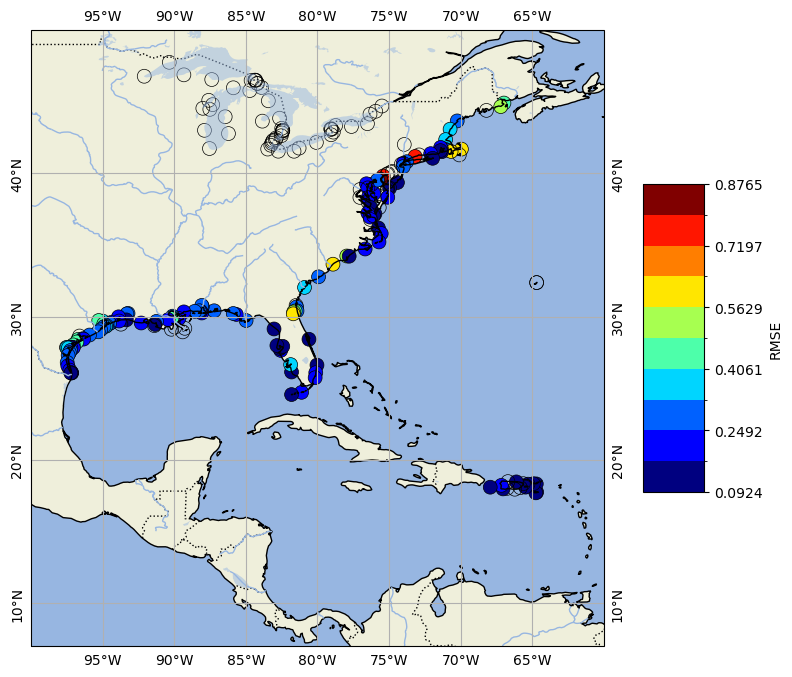

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors

# Read the rmse details CSV file
rmse_details = pd.read_csv('rmse_jason.csv')

# Extract the latitude, longitude, and RMSE values
lats = rmse_details['Latitude']
lons = rmse_details['Longitude']
rmse_values = rmse_details['RMSE']

# Set up the plot with Cartopy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the plot to the bounding box
ax.set_extent([-100, -60, 7, 50], crs=ccrs.PlateCarree())

# Add features to the plot
ax.add_feature(cfeature.COASTLINE)  # Add coastline
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add country borders
ax.add_feature(cfeature.LAND)  # Add land
ax.add_feature(cfeature.OCEAN)  # Add ocean
ax.add_feature(cfeature.LAKES, alpha=0.5)  # Add lakes
ax.add_feature(cfeature.RIVERS)  # Add rivers

# Define the bins and normalize
norm = mcolors.BoundaryNorm(boundaries=np.linspace(np.nanmin(rmse_values), np.nanmax(rmse_values), 11), ncolors=256)

# Plot the station points color-coded by RMSE values
scatter = ax.scatter(lons, lats, c=rmse_values, cmap='jet', norm=norm, marker='o', edgecolor='black', linewidth=0.5, s=100,
                     transform=ccrs.PlateCarree())

# Add a color bar
cbar = plt.colorbar(scatter, shrink=0.5, aspect=5)
cbar.set_label('RMSE')

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True)
gl.ylabel_style = {'rotation': 90}

# Display the plot
plt.show()

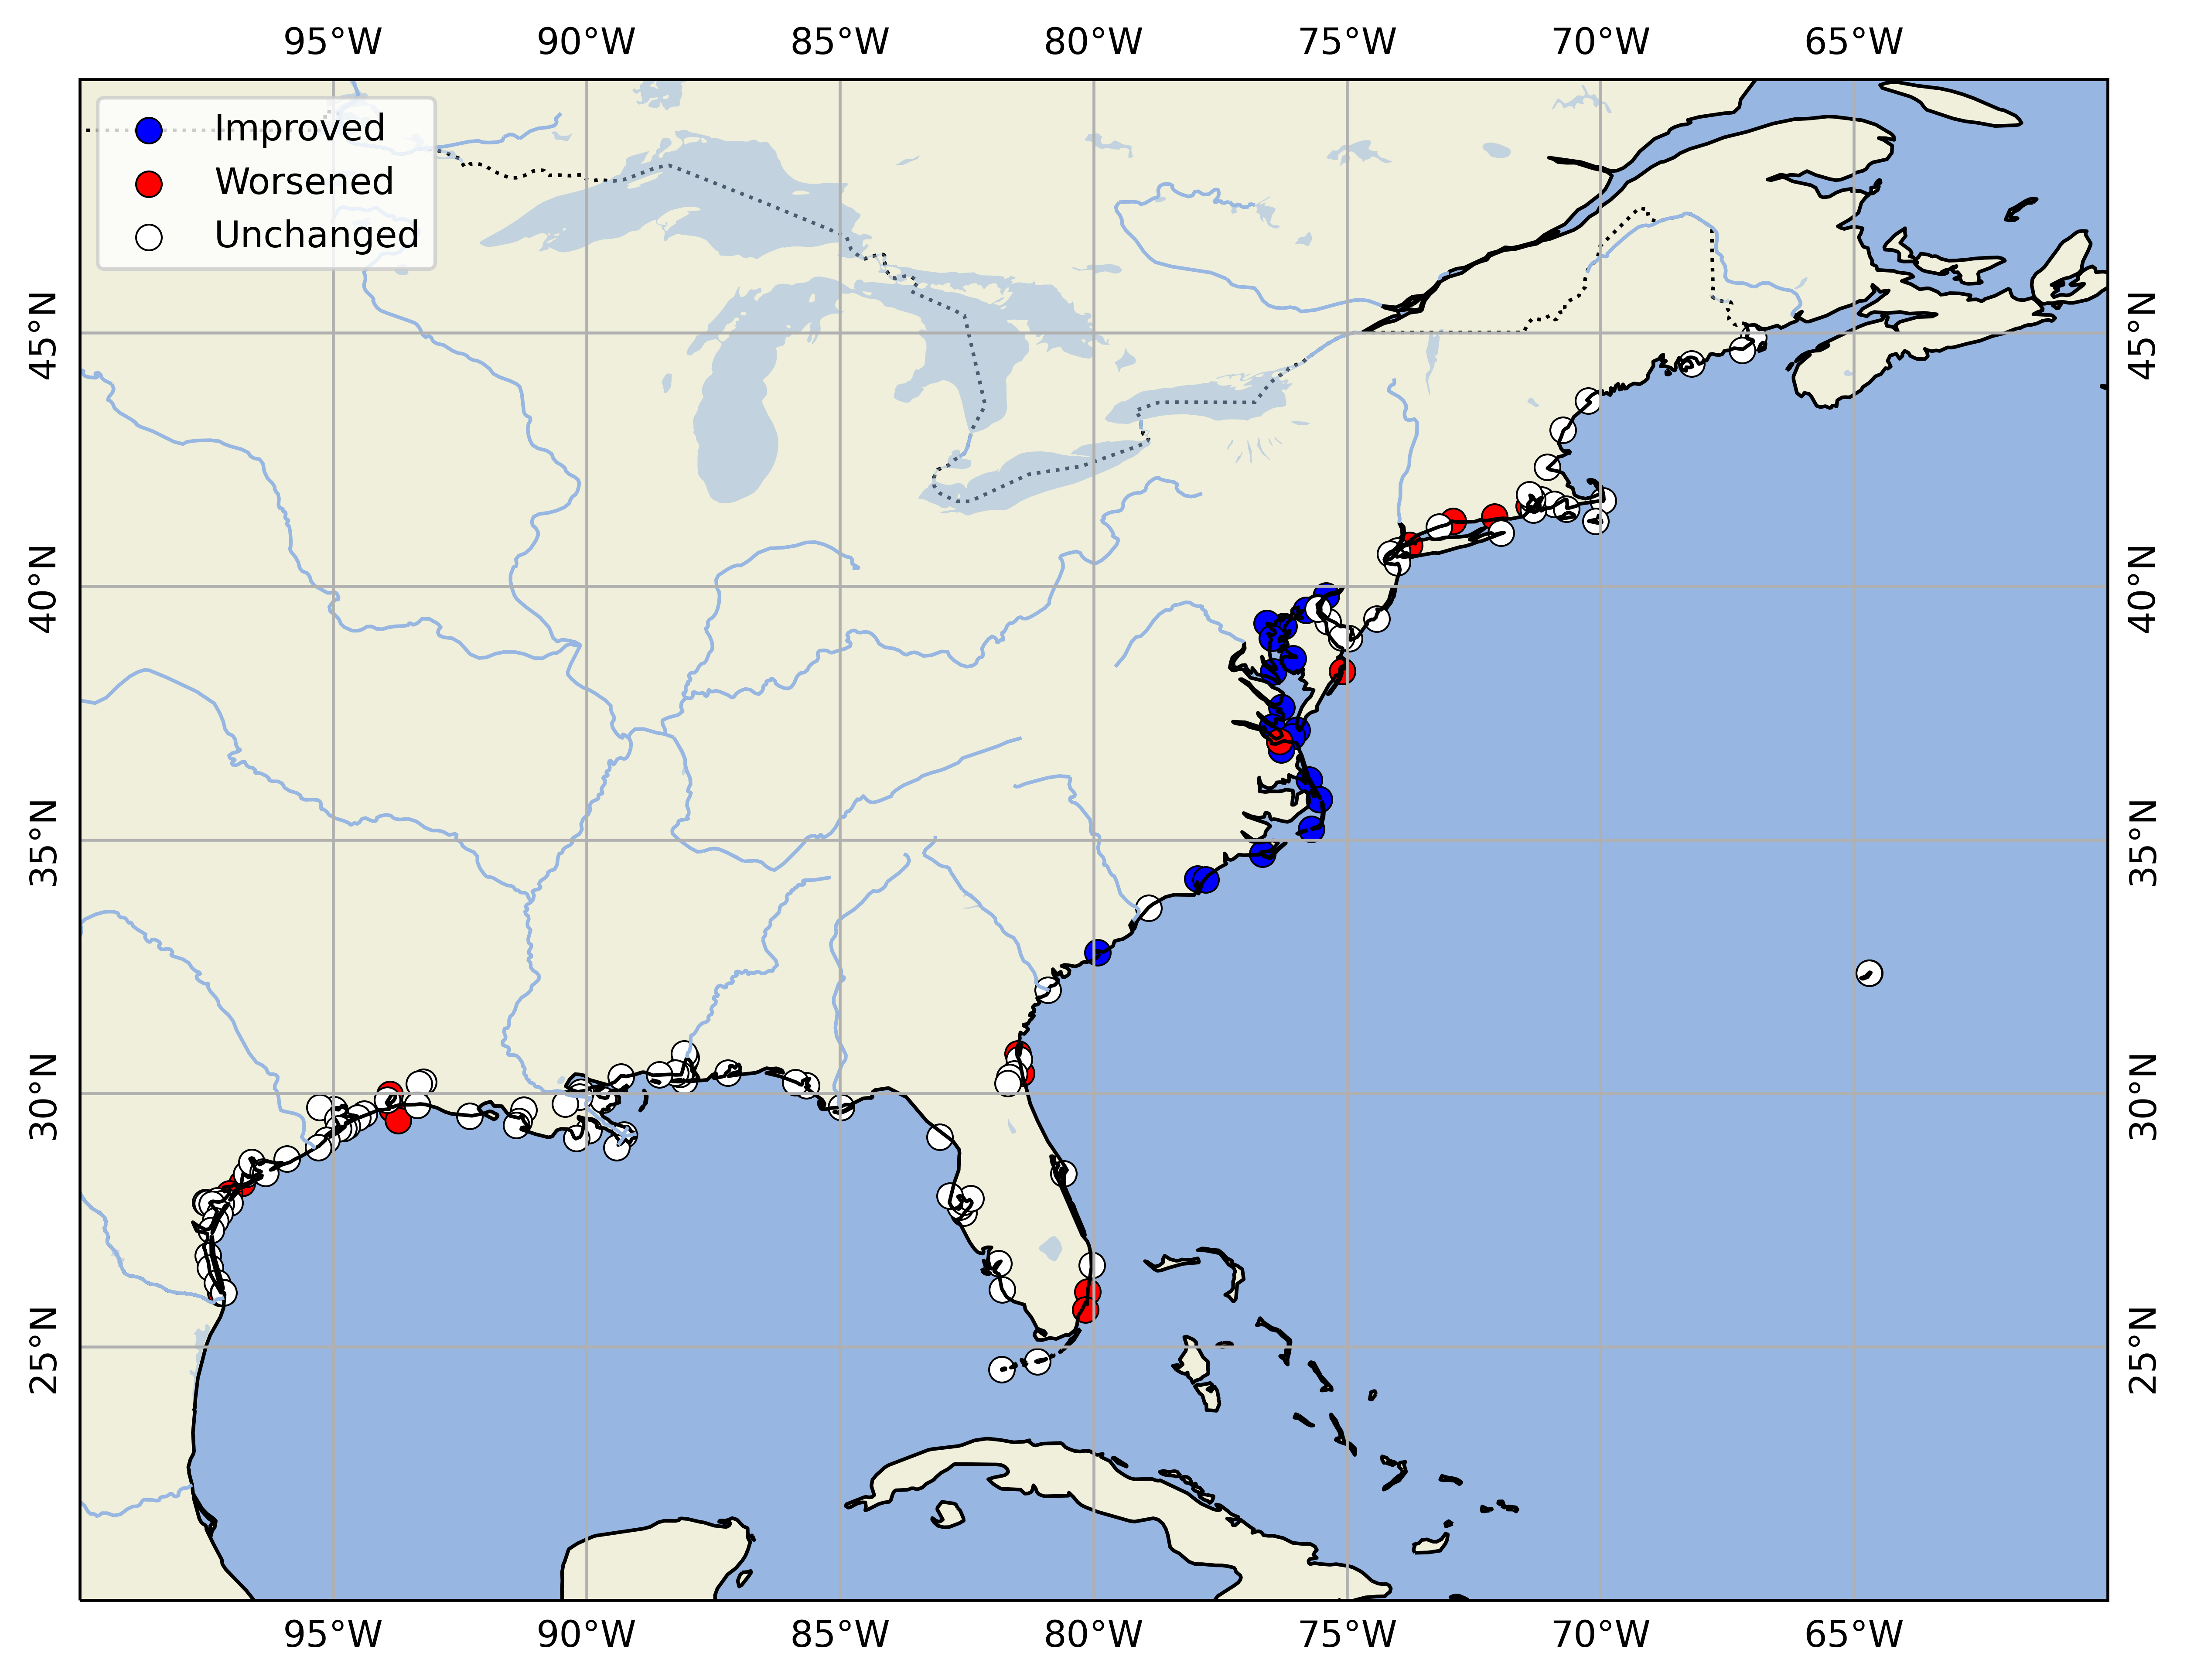

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the rmse details CSV file
rmse_details = pd.read_csv('rmse_swot_swath2.csv')

# Extract the latitude, longitude, and RMSE values
lats = rmse_details['Latitude']
lons = rmse_details['Longitude']
rmse_values = rmse_details['RMSE'].round(2)
rmse_without_values = rmse_details['RMSE-without'].round(2)

# Calculate the difference
rmse_difference = rmse_without_values - rmse_values

# Set up the plot with Cartopy
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the plot to the bounding box
ax.set_extent([-100, -60, 20, 50], crs=ccrs.PlateCarree())

# Plot the points where RMSE has improved in blue
improved_mask = rmse_difference > 0
ax.scatter(lons[improved_mask], lats[improved_mask], color='blue', edgecolor='black', linewidth=0.5, s=50, transform=ccrs.PlateCarree(), label='Improved')

# Plot the points where RMSE has worsened in red
worsened_mask = rmse_difference < 0
ax.scatter(lons[worsened_mask], lats[worsened_mask], color='red', edgecolor='black', linewidth=0.5, s=50, transform=ccrs.PlateCarree(), label='Worsened')

# Plot the points where RMSE has worsened in red
worsened_mask = rmse_difference == 0
ax.scatter(lons[worsened_mask], lats[worsened_mask], color='white', edgecolor='black', linewidth=0.5, s=50, transform=ccrs.PlateCarree(), label='Unchanged')

# Add features to the plot
ax.add_feature(cfeature.COASTLINE)  # Add coastline
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add country borders
ax.add_feature(cfeature.LAND)  # Add land
ax.add_feature(cfeature.OCEAN)  # Add ocean
ax.add_feature(cfeature.LAKES, alpha=0.5)  # Add lakes
ax.add_feature(cfeature.RIVERS)  # Add rivers

# Add a legend
plt.legend(loc='upper left')

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True)
gl.ylabel_style = {'rotation': 90}

# Display the plot
plt.show()